# Homework 2 - Instagram Profiles & Posts

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from collections import Counter
import pickle
from tqdm import tqdm

### [RQ1] After collecting information, the Data Scientists have to know what dataset they are dealing with, so let's start with an Exploratory Data Analysis (EDA). What can you say about our datasets? Please summarise its main characteristics with visual and tabular methods.

#### EDA - Profiles

In [2]:
profiles = pd.read_csv('data/instagram_profiles.zip', sep='\t')

In [3]:
print(f'Profiles data shape: {profiles.shape}')

Profiles data shape: (4509586, 11)


In [4]:
print(f'Profiles columns: {", ".join(list(profiles.columns))}')

Profiles columns: sid, profile_id, profile_name, firstname_lastname, description, following, followers, n_posts, url, cts, is_business_account


In [5]:
# Check which columns are unique
print('Unique values: ')

for col in profiles.columns:
    print(f'{col}: {profiles[col].is_unique}')

Unique values: 
sid: True
profile_id: False
profile_name: False
firstname_lastname: False
description: False
following: False
followers: False
n_posts: False
url: False
cts: False
is_business_account: False


Note: since profile_id is not unique we could have multiple snapshots for the same profile.

In [6]:
profiles.describe()

,sid,profile_id,following,followers,n_posts
count,4.509586e+06,4.477139e+06,3.452771e+06,3.452771e+06,3.452771e+06
mean,2.255992e+06,3.083302e+09,1.405641e+03,4.739899e+03,4.095414e+02
std,1.301807e+06,4.266575e+10,8.113473e+03,1.939087e+05,1.041940e+03
min,1.186000e+03,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.128596e+06,2.735177e+08,3.560000e+02,1.590000e+02,2.200000e+01
50%,2.255992e+06,1.649248e+09,7.540000e+02,4.060000e+02,1.200000e+02
75%,3.383389e+06,5.514691e+09,1.573000e+03,9.740000e+02,4.200000e+02
max,4.510785e+06,9.001013e+13,4.191080e+06,2.854576e+08,1.837300e+05


In [7]:
# Drop irrelevant features
profiles = profiles.drop(['sid', 'firstname_lastname', 'description', 'url'], axis=1)

In [8]:
# Check NA values
for col in profiles.columns:
    print(f'NA for {col}: {sum(profiles[col].isna())} / {len(profiles)}')

NA for profile_id: 32447 / 4509586
NA for profile_name: 0 / 4509586
NA for following: 1056815 / 4509586
NA for followers: 1056815 / 4509586
NA for n_posts: 1056815 / 4509586
NA for cts: 438488 / 4509586
NA for is_business_account: 1064263 / 4509586


In [9]:
# Replace na values for the number of following, followers, posts and set the false default value for the flag is_business account
profiles['following'].fillna(0, inplace=True)
profiles['followers'].fillna(0, inplace=True)
profiles['n_posts'].fillna(0, inplace=True)
profiles['is_business_account'].fillna(False, inplace=True)

In [10]:
# Drop all other na values
profiles = profiles.dropna()

In [11]:
# Unfortunately we still have duplicated ids
if profiles['profile_id'].is_unique:
    print('Profile ids are now unique')
else:
    print('Profile ids are still not unique!')

Profile ids are still not unique!


In [12]:
# To get unique profile ids we select the profiles with the latest cts value
profiles = profiles.sort_values('cts', ascending=False).drop_duplicates('profile_id')

In [13]:
if profiles['profile_id'].is_unique:
    print('Profile ids are now unique')
else:
    print('Profile ids are still not unique!')

Profile ids are now unique


In [14]:
# Note: let's check how the shape of the dataset has changed
print(f'Profiles data shape: {profiles.shape}')

profiles.head()

Profiles data shape: (4037872, 7)


,profile_id,profile_name,following,followers,n_posts,cts,is_business_account
326832,2.144905e+07,kseniya_gl,435.0,641.0,415.0,2019-08-19 02:00:53.514 -0400,False
326833,1.738514e+09,svejk_restaurant,6266.0,5508.0,697.0,2019-08-19 02:00:45.830 -0400,True
326820,1.181472e+10,eduard_bayrit,78.0,46.0,13.0,2019-08-19 02:00:18.459 -0400,False
326831,2.895151e+08,zheka_bonda,649.0,429.0,2421.0,2019-08-19 02:00:17.692 -0400,False
326830,5.023732e+08,chic_chic_vlg,1497.0,9426.0,6720.0,2019-08-19 01:59:59.902 -0400,True


<AxesSubplot:>

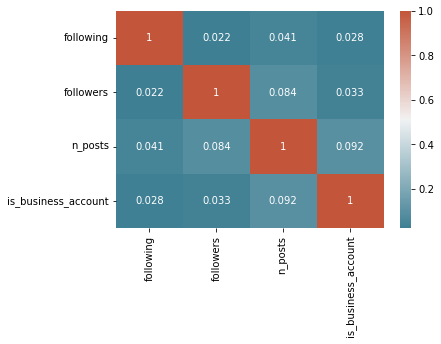

In [15]:
# Now let's see if there are some correlations between profile's features
corr = profiles[['following', 'followers', 'n_posts', 'is_business_account']].corr()

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

It seems to be no correlation between the columns of our table.

#### EDA - Locations 

In [16]:
locations = pd.read_csv('data/instagram_locations.zip', sep='\t')

In [17]:
print(f'Locations data shape: {locations.shape}')

Locations data shape: (1022658, 23)


In [18]:
print(f'Locations columns: {", ".join(list(locations.columns))}')

Locations columns: sid, id, name, street, zip, city, region, cd, phone, aj_exact_city_match, aj_exact_country_match, blurb, dir_city_id, dir_city_name, dir_city_slug, dir_country_id, dir_country_name, lat, lng, primary_alias_on_fb, slug, website, cts


In [19]:
# Check which columns are unique
print('Unique values: ')

for col in locations.columns:
    print(f'{col}: {locations[col].is_unique}')

Unique values: 
sid: True
id: True
name: False
street: False
zip: False
city: False
region: False
cd: False
phone: False
aj_exact_city_match: False
aj_exact_country_match: False
blurb: False
dir_city_id: False
dir_city_name: False
dir_city_slug: False
dir_country_id: False
dir_country_name: False
lat: False
lng: False
primary_alias_on_fb: False
slug: False
website: False
cts: False


In [20]:
locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022658 entries, 0 to 1022657
Data columns (total 23 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   sid                     1022658 non-null  int64  
 1   id                      1022658 non-null  int64  
 2   name                    1022658 non-null  object 
 3   street                  715704 non-null   object 
 4   zip                     715579 non-null   object 
 5   city                    937166 non-null   object 
 6   region                  1760 non-null     object 
 7   cd                      939010 non-null   object 
 8   phone                   601688 non-null   object 
 9   aj_exact_city_match     1000510 non-null  object 
 10  aj_exact_country_match  1000510 non-null  object 
 11  blurb                   406705 non-null   object 
 12  dir_city_id             495698 non-null   object 
 13  dir_city_name           495698 non-null   object 
 14  di

In [21]:
# Drop irrelevant features
locations = locations.drop(['sid', 'phone', 'aj_exact_city_match', 'aj_exact_country_match', 
                            'blurb', 'dir_city_id', 'dir_city_name', 'dir_city_slug', 'dir_country_id', 
                            'dir_country_name', 'primary_alias_on_fb', 'slug', 'website', 'cts'], axis=1)

In [22]:
# Check NA values
for col in locations.columns:
    print(f'NA for {col}: {sum(locations[col].isna())} / {len(locations)}')

NA for id: 0 / 1022658
NA for name: 0 / 1022658
NA for street: 306954 / 1022658
NA for zip: 307079 / 1022658
NA for city: 85492 / 1022658
NA for region: 1020898 / 1022658
NA for cd: 83648 / 1022658
NA for lat: 6163 / 1022658
NA for lng: 6163 / 1022658


In [23]:
# Replacing NA values for street, zip, city, region and cd
locations['street'].fillna('', inplace=True)
locations['zip'].fillna('', inplace=True)
locations['city'].fillna('', inplace=True)
locations['region'].fillna('', inplace=True)
locations['cd'].fillna('', inplace=True)

In [24]:
# Note: let's check how the shape of the dataset has changed
print(f'Locations data shape: {locations.shape}')

locations.head()

Locations data shape: (1022658, 9)


,id,name,street,zip,city,region,cd,lat,lng
0,110296492939207,"Playa de Daimuz - Valencia, España",,,,,,-0.139475,38.974391
1,274391278,Nová Vieska,,,Nová Vieska,,SK,18.466667,47.866667
2,148885595789195,Everest Today,Himalayas,+977,"Kathmandu, Nepal",,NP,85.330150,27.701960
3,263258277,BULAC - Bibliothèque universitaire des langues...,"65, rue des Grands-Moulins",75013,"Paris, France",,FR,2.375995,48.827240
4,406147529857708,ABC Cable Networks Group,3800 W Alameda Ave,91505,"Burbank, California",,US,-118.341864,34.153265


Since the location dataset is just a lookup table to geocalize posts there is no point trying to find correlation between its features.

#### EDA - Posts

In [27]:
# Since this dataset it too large we will use a sample to performe exploratory analysis
posts_sample = pd.DataFrame()

for chunk in tqdm(pd.read_csv('data/instagram_posts.zip', sep='\t', chunksize=500000)):
    posts_sample = pd.concat([posts_sample, chunk[:5]])

86it [05:19,  3.71s/it]


In [28]:
# Pickle dataframe
posts_sample.to_pickle("./pickles/posts_sample.pkl")

In [ ]:
# Read dataframe from pickle
posts_sample = pd.read_pickle("./pickles/posts_sample.pkl")  

In [29]:
print(f'Posts sample data shape: {posts_sample.shape}')

Posts sample data shape: (430, 10)


In [30]:
print(f'Posts columns: {", ".join(list(posts_sample.columns))}')

Posts columns: sid, sid_profile, post_id, profile_id, location_id, cts, post_type, description, numbr_likes, number_comments


In [31]:
posts_sample.describe()

,sid,sid_profile,profile_id,location_id,post_type,numbr_likes,number_comments
count,4.300000e+02,4.300000e+02,4.060000e+02,3.090000e+02,430.000000,430.000000,430.000000
mean,2.164603e+07,1.564128e+06,2.783811e+09,3.478339e+14,1.032558,98.679070,3.932558
std,1.218386e+07,1.623560e+06,3.251416e+09,6.461377e+14,0.177684,205.961114,7.612872
min,7.324400e+04,-1.000000e+00,5.502060e+05,5.368000e+04,1.000000,1.000000,0.000000
25%,1.138816e+07,-1.000000e+00,2.646028e+08,2.365960e+08,1.000000,15.000000,0.000000
50%,2.163622e+07,1.046737e+06,1.482156e+09,5.396627e+08,1.000000,42.000000,1.000000
75%,3.192472e+07,3.345948e+06,4.523706e+09,3.545914e+14,1.000000,104.750000,4.000000
max,4.306760e+07,4.474973e+06,1.273958e+10,2.049464e+15,2.000000,3160.000000,79.000000


### [RQ2] Let's explore the dataset by finding simple insights regarding the profile and posts.

- Plot the number of posts for each profile in descending order.

In [48]:
profiles['n_posts'].describe()

count    4.037872e+06
mean     3.230900e+02
std      9.123781e+02
min      0.000000e+00
25%      2.000000e+00
50%      6.200000e+01
75%      3.090000e+02
max      1.837300e+05
Name: n_posts, dtype: float64

<AxesSubplot:ylabel='Frequency'>

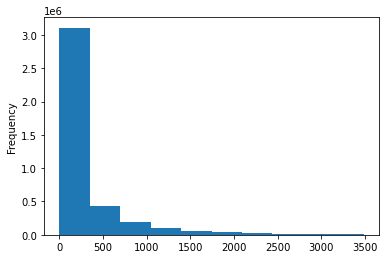

In [26]:
# Since there are some extremely high values we plot the 99 quantile of the profile dataset
q = profiles["n_posts"].quantile(0.99)

profiles[profiles["n_posts"] < q].sort_values('n_posts', ascending=False)['n_posts'].plot(kind='hist')

- What posts have the highest number of "likes"?

In [26]:
most_liked_posts = pd.DataFrame(columns=['post_id', 'numbr_likes'])

for chunk in tqdm(pd.read_csv('data/instagram_posts.zip',
                              sep='\t', chunksize=500000,
                              usecols=['post_id', 'numbr_likes'])):

    # Get for each chunk the top 10 liked posts
    chunk_top = chunk.sort_values(by='numbr_likes', ascending=False).head(10)
    
    most_liked_posts = pd.concat([most_liked_posts, chunk_top])

86it [20:52, 14.57s/it]


In [27]:
# Show the top 10 liked posts
most_liked_posts.sort_values(by='numbr_likes', ascending=False).head(10)

,post_id,numbr_likes
19624085,Bt3yaXmAM0d,8822952.0
19623988,BuwffB7g8cK,5447066.0
19624082,Buc1gyZAaMQ,5116398.0
19623986,BvcukE8AMuG,4271466.0
39701024,BqSLFVBFLfq,4264745
6293907,BwTSXBKg7gN,3586546
19624086,Btw8pFXAvQm,3558599.0
19802016,BvC3n6_gqin,3533326.0
30850564,Bw7vqLrFkHi,3340297
39812576,Bw2gTH1AiDA,3311246


- What posts have the most and the least number of comments?

In [28]:
most_commented_posts = pd.DataFrame(columns=['post_id', 'number_comments'])
least_commented_posts = pd.DataFrame(columns=['post_id', 'number_comments'])

for chunk in tqdm(pd.read_csv('data/instagram_posts.zip',
                              sep='\t', chunksize=500000,
                              usecols=['post_id', 'number_comments'])):

    sorted_chunk = chunk.sort_values(by='number_comments', ascending=False)
    chunk_top = sorted_chunk[:10]
    chunk_bottom = sorted_chunk[-10:]
    
    most_commented_posts = pd.concat([most_commented_posts, chunk_top])
    least_commented_posts = pd.concat([least_commented_posts, chunk_bottom])

86it [03:25,  2.39s/it]


In [29]:
most_commented_posts.sort_values(by='number_comments', ascending=False).head(10)

,post_id,number_comments
41873060,Bx2sPAjHviO,488953
12164781,BuGjhWAhAW5,313997
33261751,BJ-rkpTgn1N,257488
11149127,BMtisIxjhtT,214365
9383817,BzOOWj3DfZK,189888
5427268,BoQoM-JFkPA,180635
25257169,Bwarws1lCok,173988
6220011,Bt4qlVDAZMH,170836
31689573,Bs9NhQkAcJA,166919
14257307,Bzqb95QI_1E,166198


In [30]:
least_commented_posts.sort_values(by='number_comments').head(10)

,post_id,number_comments
77502,BxR8xjHAdCt,0
28820509,BozrU3zhSZo,0
28820510,BozrCIdBZz-,0
28820511,BozqzWAhfxO,0
28601677,BwayM3CHjiy,0
28601674,BwillN1nGn3,0
28601673,BwqA8lpH9Ir,0
28820519,BwwanZ-FFA3,0
28601671,BwxiDNNnGXl,0
28601670,BxI4V_DnDPH,0


- How many posts include tagged locations, and how many do not? Show it using an appropriate chart and comment your results.

In [31]:
nan_location_count = 0
posts_count = 0

for chunk in tqdm(pd.read_csv('data/instagram_posts.zip',
                              sep='\t', chunksize=500000,
                              usecols=['post_id', 'location_id'])):

    nan_location_count += chunk['location_id'].isnull().sum()
    posts_count += len(chunk)

86it [03:18,  2.31s/it]


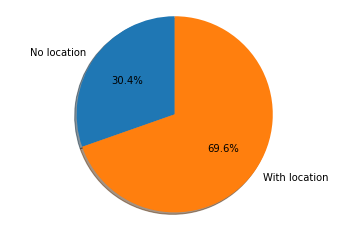

In [33]:
# Pie chart
labels = ['No location', 'With location']
sizes = [nan_location_count, posts_count - nan_location_count]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

As we can see from the pie chart, most of the posts are geolocalized.

- How many posts include only photos? How many also have videos?

In [34]:
type_counter = Counter()

for chunk in tqdm(pd.read_csv('data/instagram_posts.zip',
                              sep='\t', chunksize=500000,
                              usecols=['post_id', 'post_type'])):

    c = Counter(chunk['post_type'])

    type_counter = sum([type_counter, c], Counter())

86it [03:20,  2.34s/it]


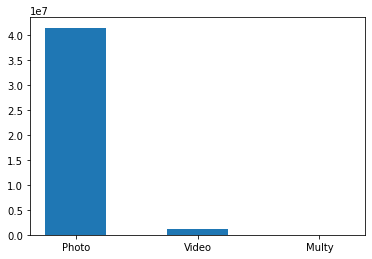

In [36]:
# Bar chart
labels = ['Photo', 'Video', 'Multy'] # From the kaggle description of the dataset we know that: 1 - Photo, 2 - Video, 3 - multy
sizes = [type_counter[1], type_counter[2], type_counter[3]]

plt.bar(labels, sizes, width = 0.5)
plt.show()

- What's the percentage of business accounts vs non-business? What can you interpret regarding that percentage?

In [37]:
# Since we have a flag we can sum up all the values of the column is_business_account
business_profiles_count = sum(profiles['is_business_account'])

In [42]:
print(f'The percentage of business accounts is {round(business_profiles_count/len(profiles), 2) * 100} %')
print(f'While the percentage of non-business accounts is {round(1 -(business_profiles_count/len(profiles)), 2) * 100} %')

The percentage of business accounts is 20.0 %
While the percentage of non-business accounts is 80.0 %


As we could except the number of business accounts is lower, in particular its proportion with the total number of users reminds the Pareto distribution.

### [RQ3] Now it's important to understand the most common times in which users publish their posts



- What is the most common time in which users publish their posts?

In [ ]:
most_common_hour_counter = Counter()

for chunk in tqdm(pd.read_csv('data/instagram_posts.zip',
                              sep='\t', chunksize=500000,
                              usecols=['post_id', 'cts'])):

    # Drop na values for cts
    chunk = chunk.dropna(subset=['cts'])
    
    # Create a column to save only the hour
    chunk['hour'] =  pd.to_datetime(chunk['cts']).dt.hour 
    
    # Save the hour data into a counter
    c = Counter(chunk['hour'])
    
    most_common_hour_counter = sum([most_common_hour_counter, c], Counter())

In [51]:
most_common_hour_counter.most_common(1)

[(19, 2499758)]

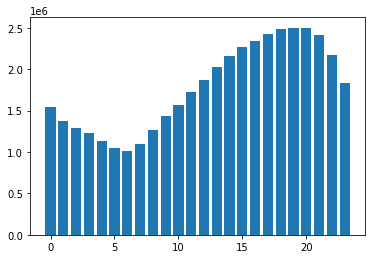

In [53]:
# To get a better picture we can plot all data from our counter
labels = list(most_common_hour_counter.keys())
sizes = list(most_common_hour_counter.values())

plt.bar(labels, sizes)
plt.show()

The number of posts published increases during the day, starting at 6 with a peak at 19, and decreases during the night.

- Create a function that receives a time intervals list as a parameter and returns a plot with the number of posts for each given interval.

In [47]:
def find_post_in_range(time_intervals):
    
    # To plot the desired result we'll create a dict where the keys represents the bins of the plot and the values their associated counts
    posts_for_interval = {}
        
    for chunk in tqdm(pd.read_csv('data/instagram_posts.zip',
                                      sep='\t', chunksize=500000,
                                      usecols=['post_id', 'cts'])):
        
        chunk = chunk.dropna(subset=['cts'])
        
        chunk['hour'] =  pd.to_datetime(chunk['cts']).dt.hour

        counter = Counter(chunk['hour'])
            
        for interval in time_intervals:
            n_posts = 0
            
            for hour in counter:
                # If the hour is between the interval we sum the number of post to n_posts
                if interval[0] <= hour < interval[1]:
                    n_posts += counter[hour]
        
            # If the key already exists we increment the number of posts, otherwise we initialize the value to 0
            if f'{interval[0]}-{interval[1]}' in posts_for_interval.keys():
                posts_for_interval[f'{interval[0]}-{interval[1]}'] += n_posts
            else:
                posts_for_interval[f'{interval[0]}-{interval[1]}'] = 0

    return posts_for_interval    

- Use the function that you created in the previous literal to plot the number of posts between the following time intervals: <br>
06:00:00 - 10:59:59 <br>
11:00:00 - 13:59:59 <br>
14:00:00 - 16:59:59 <br>
17:00:00 - 19:59:59 <br>
20:00:00 - 23:59:59 <br>
00:00:00 - 02:59:59 <br>
03:00:00 - 05:59:59 <br>

In [ ]:
time_intervals = [[6, 11], [11, 14], [17, 20], [20, 24], [0, 3], [3, 6]]
hist = find_post_in_range(time_intervals)

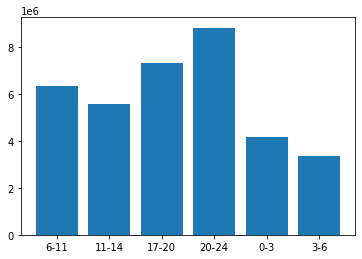

In [56]:
plt.bar(list(hist.keys()), list(hist.values()))
plt.show()

### [RQ4] In most cases, we will not have a consistent dataset, and the one we are dealing with is not an exception (ex. in the given datasets, you may not find the information of the profiles for some of the posts). So let’s enhance our analysis.

- Write a function that, given a profile_id, will be able to return the posts that belong to the given profile_id.

In [87]:
def get_profile_posts(profile_id):
    profile_posts = pd.DataFrame(columns=['post_id', 'profile_id', 'numbr_likes', 'number_comments', 'cts'])
    
    for chunk in tqdm(pd.read_csv('data/instagram_posts.zip',
                                      sep='\t', chunksize=500000,
                                      usecols=['post_id', 'profile_id', 'numbr_likes', 'number_comments', 'cts'])):

        profile_rows = chunk.loc[chunk['profile_id'] == profile_id]
        profile_posts = pd.concat([profile_posts, profile_rows])
    
    return profile_posts

- Write another function that, given an input n (an integer), will return the posts that belong to the n top posted profiles (top n profiles that have posted the highest number of posts) that their data is available in the profile.csv using the previously written function.

In [88]:
def get_top_profiles_posts(n):
    
    top_posts = pd.DataFrame(columns=['post_id', 'profile_id', 'numbr_likes', 'number_comments', 'cts'])
    
    # Get top n profiles from the profiles dataset
    top_profiles = profiles.sort_values('n_posts', ascending=False)[:n]
    
    # Use the get_profile_posts() function to extract posts of interest
    for profile_id in top_profiles['profile_id']:
        top_posts = pd.concat([top_posts, get_profile_posts(profile_id)])
    
    return top_posts

- What is the average number of "likes" and comments of the top 10 profiles with the highest number of posts which their information is available in profile.csv?

In [89]:
# Get top n profiles from the profiles dataset
top_posts = get_top_profiles_posts(10)

86it [03:43,  2.60s/it]
86it [03:43,  2.60s/it]
86it [03:41,  2.58s/it]
86it [03:40,  2.56s/it]
86it [03:41,  2.57s/it]
86it [03:43,  2.60s/it]
86it [03:40,  2.56s/it]
86it [03:39,  2.56s/it]
86it [03:39,  2.55s/it]
86it [03:39,  2.55s/it]


In [90]:
# Pickle dataframe for future use
top_posts.to_pickle("./pickles/top_posts.pkl")

In [135]:
# Read dataframe from pickle
top_posts = pd.read_pickle("./pickles/top_posts.pkl")  

In [91]:
# Calculate averages for likes and comments
avg_likes = top_posts.groupby('profile_id')['numbr_likes'].mean()
avg_comments = top_posts.groupby('profile_id')['number_comments'].mean()

In [92]:
# Show results for each profile_id
pd.concat([avg_likes, avg_comments], axis=1).reset_index().rename(columns={'numbr_likes':'avg_likes', 'number_comments':'avg_comments'})

,profile_id,avg_likes,avg_comments
0,9.813508e+06,0.296296,0.000000
1,1.996648e+08,7.666667,0.000000
2,2.181730e+08,0.400000,0.040000
3,2.855497e+08,3.921875,0.000000
4,1.273455e+09,2.960000,0.040000
5,1.603890e+09,6.477612,0.044776
6,1.607309e+09,1.540541,0.000000
7,1.701679e+09,1.447368,0.000000
8,8.563367e+09,0.000000,0.000000


- Plot the number of posts that these top 10 profiles have sent on Instagram in the given interval in question RQ3. Interpret the resulting chart.

In [142]:
time_intervals = [[6, 11], [11, 14], [17, 20], [20, 24], [0, 3], [3, 6]]

# Drop posts with na cts
top_posts = top_posts.dropna(subset=['cts'])

# get hour for each posts
top_posts['hour'] =  pd.to_datetime(top_posts['cts']).dt.hour

# Initialized time_interval column
top_posts['time_interval'] = '0-0'

# Set time interval based on hour column
for interval in time_intervals:
    top_posts['time_interval'] = np.where((interval[0] <= top_posts['hour']) & (top_posts['hour'] < interval[1]), f'{interval[0]}-{interval[1]}', top_posts['time_interval'])

In [148]:
grouped = top_posts.groupby('time_interval')['post_id'].count().reset_index(name='n_posts').sort_values('n_posts', ascending=False)

<AxesSubplot:xlabel='time_interval'>

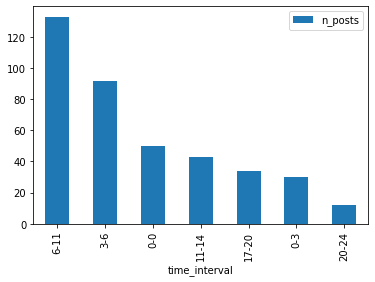

In [151]:
grouped[['time_interval', 'n_posts']].plot(kind='bar', x='time_interval', y='n_posts')

As we can see from the chart, profiles that posts the most tend to publish during the morning. 
This is a completely different trend from the one we observed with posts published from all profiles.

# [RQ5] The most influential users are the ones with the highest number of “followers", you can now look more into their activity.

- Plot the top 10 most popular users in terms of followers and their number of posts.

In [25]:
popular_profiles = profiles.sort_values('followers', ascending=False).head(10)

<AxesSubplot:xlabel='profile_name'>

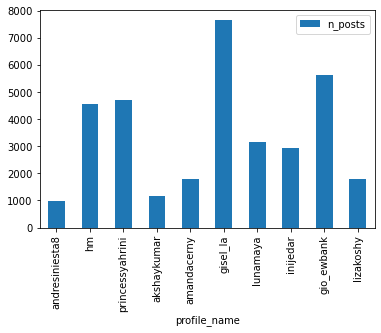

In [32]:
popular_profiles.plot(kind='bar', x='profile_name', y='n_posts')

- Who is the most influential user?

In [101]:
print(f'The most influential user is {popular_profiles.iloc[0]["profile_name"]} with {popular_profiles.iloc[0]["followers"]} followers')

The most influential user is andresiniesta8 with 29542143.0 followers


- Have they posted anything with tagged locations? Extract the most frequent areas on their posts and plot the number of times each city has been visited.

In [26]:
# Save to into a lists ids from popular_profiles
popular_profiles_ids = popular_profiles['profile_id']

In [35]:
location_counter = Counter()

for chunk in tqdm(pd.read_csv('data/instagram_posts.zip',
                                      sep='\t', chunksize=500000,
                                      usecols=['profile_id', 'location_id'])):

    # get only geocalized posts
    chunk = chunk[chunk['location_id'].notna()]

    for profile_id in popular_profiles_ids:
        
        # Get only the post of the current profile
        profile_rows = chunk[chunk['profile_id'] == profile_id]
            
        c = Counter(profile_rows['location_id'])
        
        location_counter = sum([location_counter, c], Counter())

86it [03:22,  2.36s/it]


In [36]:
# Get the mosts visited locations
top_locations = location_counter.most_common(10)

# Transform top_locations to dict
top_locations = {location_id:count for location_id, count in top_locations}

# Transform top_locations to dataframe
top_locations = pd.DataFrame(top_locations.items(), columns=['id', 'num_visits'])

In [37]:
# Merge top_locations with locations to get all locations names
top_locations = top_locations.merge(locations).sort_values(by='num_visits', ascending=False)
top_locations

,id,num_visits,name,street,zip,city,region,cd,lat,lng
0,2.130118e+08,9,"Sydney, Australia",,,"Sydney, Australia",,AU,151.207970,-33.867510
1,4.135631e+08,5,Osaka,,,Osaka,,JP,135.512200,34.660300
2,2.158716e+08,4,"Cape Town, Western Cape",,,"Cape Town, Western Cape",,ZA,18.423900,-33.925300
3,2.006550e+15,3,Rosewood Bangkok,"1041/38 Phloen Chit Rd, Khwaeng Lumphini",10330,"Bangkok, Thailand",,TH,100.549214,13.743137
4,2.129415e+08,3,"Miami, Florida",,,"Miami, Florida",,US,-80.192000,25.775200
5,3.669021e+08,3,"Kobe-shi, Hyogo, Japan",,,"Kobe-shi, Hyogo, Japan",,JP,135.191300,34.696400
6,1.906910e+15,2,"Bora Bora, French Polynesia",,,"Vaitape, French Polynesia",,PF,-151.751991,-16.505823
7,8.594412e+14,2,F45 Senopati North,"Jl. Senopati no 27-29, Selong, Kby. Baru, Kota...",12190,"Jakarta, Indonesia",,ID,106.808490,-6.230700
8,2.144271e+08,2,"Jakarta, Indonesia",,,"Jakarta, Indonesia",,ID,106.823300,-6.180300
9,2.419169e+08,2,Jakarta,,,"Jakarta, Indonesia",,ID,106.800000,-6.166667


<AxesSubplot:xlabel='name'>

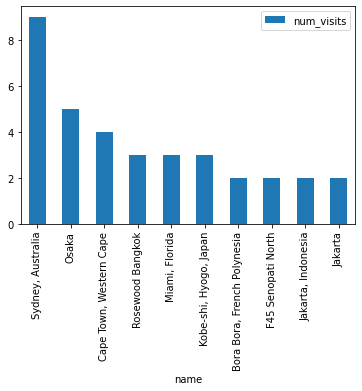

In [38]:
top_locations.plot(kind='bar', x='name', y='num_visits')

- How many pictures-only posts have they published? How many reels? (only videos) and how many with both contents? Provide the number as percentages and interpret those figures.

In [192]:
popular_profiles_posts = pd.DataFrame(columns=['post_id', 'profile_id', 'post_type', 'numbr_likes', 'number_comments'])

for chunk in tqdm(pd.read_csv('data/instagram_posts.zip',
                                      sep='\t', chunksize=500000,
                                      usecols=['post_id', 'profile_id', 'post_type', 'numbr_likes', 'number_comments'])):
        
    # Get only th posts from the most popular profiles
    selected_rows = chunk[chunk['profile_id'].isin(popular_profiles_ids)]
    popular_profiles_posts = pd.concat([popular_profiles_posts, selected_rows])

86it [03:26,  2.41s/it]


In [193]:
# Pickle dataframe
popular_profiles_posts.to_pickle("./pickles/popular_profiles_posts.pkl")

In [27]:
# Read dataframe from pickle
popular_profiles_posts = pd.read_pickle("./pickles/popular_profiles_posts.pkl")  

In [30]:
popular_profiles_posts.head()

,post_id,profile_id,post_type,numbr_likes,number_comments
2171045,8WS-oDwqtO,13384265,1,17623,139
2543217,BmYfnS1gWFr,907025384,1,382877,654
3434017,Bt4KV48FcIQ,10245870,1,1257385,5594
3545722,85DNUxAUTq,23410080,1,116059,642
3906967,3L9cmlBp-f,54305422,1,23141,414


In [31]:
# Group by profile_id and post_type
grouped = popular_profiles_posts.groupby(['profile_id', 'post_type'])['post_id'].count().reset_index(name="n_posts")[['profile_id', 'post_type', 'n_posts']]

In [32]:
# Merge to get for each post type the total number of posts the user posted (count)
grouped = grouped.merge(popular_profiles_posts.groupby('profile_id')['post_id'].count().reset_index(name="profile_n_posts"), how='outer')

In [33]:
# Calculate for each post type the percentage
grouped['percentage'] = round(grouped['n_posts'] / grouped['profile_n_posts'] * 100, 2)

In [34]:
grouped

,profile_id,post_type,n_posts,profile_n_posts,percentage
0,1948416.0,1,25,27,92.59
1,1948416.0,2,2,27,7.41
2,3261799.0,1,19,19,100.00
3,8443283.0,1,13,13,100.00
4,10245870.0,1,19,20,95.00
5,10245870.0,2,1,20,5.00
6,13384265.0,1,21,21,100.00
7,23410080.0,1,2,2,100.00
8,24239929.0,1,23,26,88.46
9,24239929.0,2,3,26,11.54


We can see that the most popular profiles tend to posts far more photos (post type 1) rather than videos.

- How many "likes" and comments did posts with only pictures receive? How about videos and mixed posts? Try to provide the average numbers and confront them with their followers amount, explaining what you can say from that comparison.

In [35]:
# Calculate average number of likes for each post type of each profile
avg_likes = popular_profiles_posts.groupby(['profile_id', 'post_type'])['numbr_likes'].mean().reset_index(name='avg_likes')
grouped = grouped.merge(avg_likes)

In [36]:
# Calculate average number of comments for each post type of each profile
avg_comments = popular_profiles_posts.groupby(['profile_id', 'post_type'])['number_comments'].mean().reset_index(name='avg_comments')
grouped = grouped.merge(avg_comments)

In [59]:
# Merge to get number of followers
follower_likes_comments = popular_profiles[['profile_id', 'followers']].merge(grouped[['profile_id', 'post_type', 'avg_likes', 'avg_comments']]).sort_values(by='followers')

# Normalize likes and comments averages
follower_likes_comments['avg_likes'] = follower_likes_comments['avg_likes'] / sum(follower_likes_comments['avg_likes'])
follower_likes_comments['avg_comments'] = follower_likes_comments['avg_comments'] / sum(follower_likes_comments['avg_comments'])

In [60]:
follower_likes_comments

,profile_id,followers,post_type,avg_likes,avg_comments
13,8443283.0,17920459.0,1,0.336265,0.306392
12,13384265.0,18313069.0,1,0.031430,0.027125
10,54305422.0,19185151.0,1,0.011901,0.026572
11,54305422.0,19185151.0,2,0.006993,0.016561
8,1948416.0,21513685.0,1,0.027447,0.056388
9,1948416.0,21513685.0,2,0.005598,0.015172
7,3261799.0,22319485.0,1,0.011274,0.009903
5,10245870.0,25021371.0,1,0.174109,0.141779
6,10245870.0,25021371.0,2,0.040808,0.032817
4,907025384.0,26252169.0,1,0.206108,0.222924


post_type
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: avg_likes, dtype: object

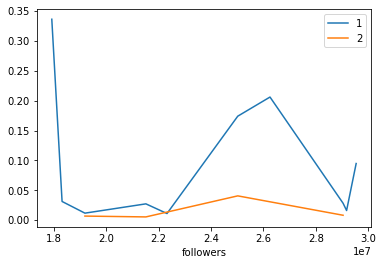

In [61]:
follower_likes_comments.set_index('followers').groupby(['post_type'])['avg_likes'].plot(legend=True)

post_type
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: avg_comments, dtype: object

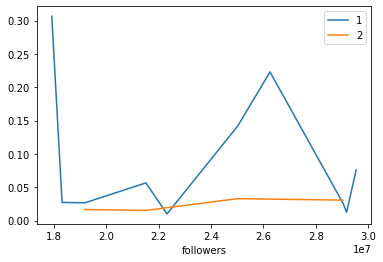

In [62]:
follower_likes_comments.set_index('followers').groupby(['post_type'])['avg_comments'].plot(legend=True)

From the charts we can see that the number of followers has more impact with posts of type 1 (images) with a similar trend both for the number of likes and the number of comments.

# [RQ6] It's time to get information from the user posting effectiveness.

- What is the average time (days and minutes) a user lets pass before publishing another post? Plot the top 3 users that publish posts more frequently (calculate the average time that passes between posts), including their amount of followers and following. Provide insights from that chart.

In [81]:
avgs_delta = pd.DataFrame(columns=['profile_id', 'avg_delta'])

for chunk in tqdm(pd.read_csv('data/instagram_posts.zip', sep='\t', chunksize=500000, 
                              usecols=['profile_id', 'cts'])):
    
    chunck = chunk.dropna(subset=['cts'])
    
    chunck = chunk.sort_values(['profile_id', 'cts'], ascending=False)
    
    #Calculate delta time between each posts
    chunk['delta'] = pd.to_datetime(chunck['cts']).diff()
    
    chunk['delta'] = abs(chunk['delta'])
    
    # Group by profile and calculate the average delta
    chunck_avgs_delta = chunk.groupby('profile_id')['delta'].mean().reset_index(name='avg_delta')
    
    # Add the top 10 of chunck_avgs_delta to the main dataframe
    avgs_delta= pd.concat([avgs_delta, chunck_avgs_delta.sort_values('avg_delta').reset_index()[:10]]) 

86it [05:53,  4.11s/it]


In [79]:
# Pickle dataframe
avgs_delta.to_pickle("./pickles/avgs_delta.pkl")

In [80]:
# Unpickle dataframe
avgs_delta = pd.read_pickle("./pickles/avgs_delta.pkl")  

In [82]:
avgs_delta = avgs_delta.sort_values('avg_delta')

In [105]:
# Merge with profiles
top3 = avgs_delta.merge(profiles[['profile_id', 'following', 'followers']])[:3]

In [112]:
top3

,profile_id,avg_delta,following,followers
0,13748608321.0,0 days 00:00:00,0.0,15.0
1,11215568734.0,0 days 00:00:00,8.0,9.0
2,12750342561.0,0 days 00:00:01,0.0,56.0


<AxesSubplot:xlabel='avg_delta'>

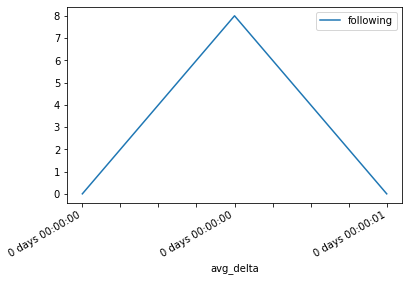

In [115]:
top3.plot(kind='line', x='avg_delta', y='following')

<AxesSubplot:xlabel='avg_delta'>

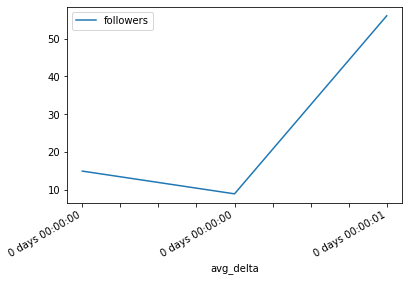

In [116]:
top3.plot(kind='line', x='avg_delta', y='followers')

Unfortunately the 3 profiles that posts more frequently don't seem to be so popular (they don't event reach 100 followers).
More interesting information could be generated merging to avgs_delta only profiles that have a certain amount of followers.

- Using the function you previously coded, plot the time intervals with the highest average number of “likes” and the ones with the highest average number of comments on posts.

In [ ]:
# TODO

# [RQ7] Of course, calculating probabilities is a job that any Data Scientist must know. So let's compute some engaging figures.

- What's the probability that a post receives more than 20% "likes" of the number of followers a user has?

In [234]:
# Get profiles with at least one follower
followed_profiles = profiles.loc[profiles['followers'] > 0][['profile_id', 'followers']]

In [78]:
# Set up a counter to collect al the boolean values
percentage_counter = Counter()

for chunk in tqdm(pd.read_csv('data/instagram_posts.zip',
                                      sep='\t', chunksize=500000,
                                      usecols=['post_id', 'profile_id', 'post_type', 'numbr_likes'])):
        
    # Join chunck with followed_profiles
    chunk = chunk.merge(followed_profiles)
    
    # Create a flag to see if the number of likes is greather than the 20% of the number of followers
    chunk['isgreater_than_20%'] = chunk['numbr_likes'] / chunk['followers'] > 0.2
    
    # Sum the new flags
    percentage_counter = sum([percentage_counter, Counter(chunk['isgreater_than_20%'])], Counter())

86it [07:52,  5.49s/it]


In [84]:
percentage_counter

Counter({False: 19480034, True: 3726231})

In [87]:
print(f'The probability that the user receives more than 20% "likes" of the number of his followers is {round(percentage_counter[1] / (percentage_counter[0] + percentage_counter[1]), 2)} %')

The probability that the user receives more than 20% "likes" of the number of his followers is 0.16 %


- Do users usually return to locations? Extract the probability that a user returns to a site after having posted it in the past. Does that probability make sense to you? Explain why or why not.

In [88]:
# Get all localized posts
localized_posts = pd.DataFrame(columns=['profile_id', 'location_id'])

for chunk in tqdm(pd.read_csv('data/instagram_posts.zip',
                                      sep='\t', chunksize=500000,
                                      usecols=['profile_id', 'location_id'])):
    # Drop nan values
    chunck = chunk.dropna()
    localized_posts = pd.concat([localized_posts, chunk])

86it [03:56,  2.75s/it]


In [ ]:
localized_posts = localized_posts.sort_values(['profile_id', 'location_id'])

In [93]:
# Pickle dataframe
top_posts.to_pickle("./pickles/localized_posts.pkl")

In [25]:
# Unpickle dataframe
localized_posts = pd.read_pickle("./pickles/localized_posts.pkl")  

In [26]:
# Count the number of visited location for each profile
profile_location_uniques = localized_posts.groupby('profile_id')['location_id'].nunique().reset_index(name='n_locations')

In [27]:
# Get size for each profile and location
profile_location_duplicates = localized_posts.groupby(['profile_id','location_id']).size().reset_index(name='n_duplicates')

# Adjust column to match the number of duplicates for location
profile_location_duplicates['n_duplicates'] = profile_location_duplicates['n_duplicates'] - 1

In [28]:
# Group profile_location_duplicates by profile and sum the duplicates, then merge with profile_location_uniques
profile_loc_dup = profile_location_duplicates.groupby('profile_id')['n_duplicates'].sum().reset_index().merge(profile_location_uniques)

In [29]:
# Calculate for each user the probability to return to a location which will be n_duplicates / n_locations
profile_loc_dup['return_prob'] = profile_loc_dup['n_duplicates'] / profile_loc_dup['n_locations'] * 100

In [30]:
# Get the average probability from all profiles
print(f'The average probability that a user return to a site is {round(profile_loc_dup["return_prob"].mean(), 2)}%')

The average probability that a user return to a site is 35.77%


Unfortunately, the calculated probability does not take several factors into account, so we cannot consider it to be reliable.
A time interval should be defined beyond which a post in the same location can be considered related to a new trip.

For example, posts published during a week on vacation should be considered as one trip and therefore should not raise the probability that we are looking for.

# [RQ8] Every decision you take in a data-based environment should be reinforced with charts, statistical tests and analysis methods to check whether a hypothesis is correct or not.

- Does more “likes” also mean more comments? Plot a scatter plot of “likes” vs comments for posts.

<AxesSubplot:xlabel='numbr_likes', ylabel='number_comments'>

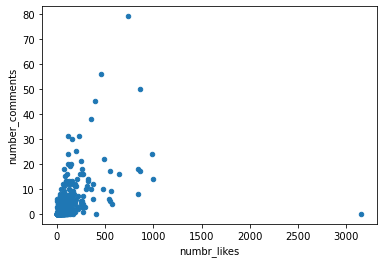

In [47]:
# We use posts_sample
posts_sample.plot(kind='scatter', x='numbr_likes', y='number_comments')

- Can you find any significant relationship between the time a user publishes a post and the number of comments and “likes”? Use an appropriate statistical test or technique and support your choice.

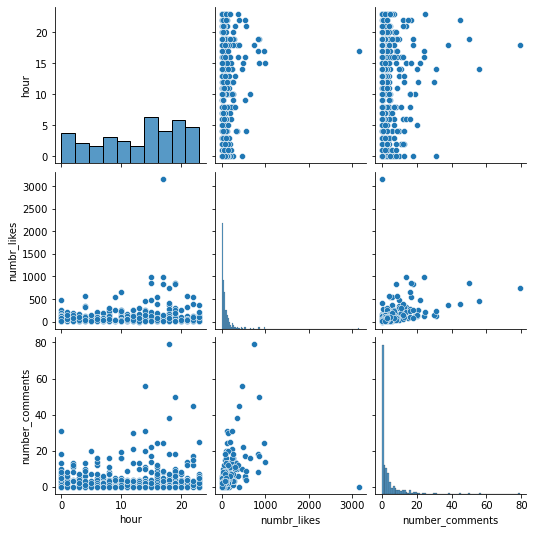

In [52]:
posts_sample['hour'] =  pd.to_datetime(posts_sample['cts']).dt.hour

sns.pairplot(posts_sample[['hour', 'numbr_likes', 'number_comments']])

As can be seen from the graphs, there seems to be no correlation between the time a user publishes a post and the number of comments or likes.

- What’s the distribution of followers? Plot the empirical distribution of followers amongst all users and extract the mean, mode, and quantiles. Interpret those figures.

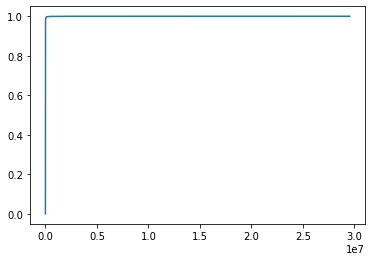

In [46]:
# Empirical distribution
def ecdf(x):
    xs = np.sort(x)
    ys = np.arange(1, len(xs)+1)/float(len(xs))
    return xs, ys

xs, ys = ecdf(profiles['followers'])
plt.plot(xs, ys)

In [37]:
# Mean and quantiles
profiles['followers'].describe()

count    4.037872e+06
mean     3.093541e+03
std      7.691628e+04
min      0.000000e+00
25%      5.300000e+01
50%      2.760000e+02
75%      7.710000e+02
max      2.954214e+07
Name: followers, dtype: float64

In [42]:
# Mode
profiles['followers'].mode()

0    0.0
dtype: float64

As can be seen from the extracted information, the mode of the number of followers is equal to the minimum value.
The mean, on the other hand, is strongly influenced by a series of very high values; in fact, we can see that it is much higher than the median

- What are histograms, bar plots, scatterplots and pie charts used for?

Histogramns breaks down a numeric feature into bins (interval groups) and shows the frequency of data for each group. They are useful to approximise the distribution of numeric data. For example, to measure sales in 3-month time intervals.

Bar plots are similar to histograms but the x-axis in this case is a categorical attribute instead of numeric interval. They are useful to compare measure of categorical dimension. For example, to compare the sales of 3 stores of the same chain in different cities.

Scatterplots plots two numeric attributes to visualize if there is a correlation between axes. They are commonly used to identify regression type of relationships such as linear regression, logistic regression etc. For example, to see if there is a correlation between the price of houses and their square footage.

Pie charts are used to depicts how much each component occupies the whole. They are useful to visualize the weight of components belonging to one categorical attribute. For example, For example, to view the main summer beverages sold in the last summer.

- What insights can you extract from a Box Plot?

Box plots provide a quick visual summary of the variability of values in a dataset. They show the median, upper and lower quartiles, minimum and maximum values, and any outliers in the dataset.

# [AQ1] Given the following pseudocode, answer the questions:

```
Input: 
    N : an integer 
    List : array of characters of length N without repetition
    
function f1(sequence, end): 
    For i=0 To end:
        OUTPUT sequence[i]
    EndFor
    Output "\n"
    
function f2(sequence, start, end): 
    If start = end: 
        f1(sequence, end)
    Else
        For i=start To end: 
            temp <-- sequence[start]
            sequence[start] <-- sequence[i]
            sequence[i] <-- temp
            f2(sequence, start+1, end)
            temp <-- sequence[start]
            sequence[start] <-- sequence[i]
            sequence[i] <-- temp
f2(List, 0, N)
```

- What is the output of this algorithm? Describe the mechanism of the algorithm in detail . We do not want to know only its final result. (Describe one example on your own)

```
The output of the algorithm consists of a print of all possible permutations of the list taken as input.
Given the length is N, all the possibile combinations will be (N!).

Example:
N: 3
List: ['a', 'b', 'c']

Output:
['a', 'b', 'c']
['a', 'c', 'b']
['b', 'a', 'c']
['b', 'c', 'a']
['c', 'b', 'a']
['c', 'a', 'b']

The first function simply print the sequence of characters.

The second function uses a recursive approeach.
The first condition determines the end of a recursion and calls the first function to print the list.
If the condition start = end is not true we have a for loop which will:
- swap sequence[start] and sequence[i] 
- make a recursive call and finally
- swap again sequence[start] and sequence[i].

```

- What is asymptotically (i.e., we are asking for big-O complexity) the algorithm's running time as a function of N?

```

T(n) = n T(n - 1)

-> Substitute T(n -1) = (n - 1) T(n - 2)

T(n) = n (n - 1) T(n - 2)

.
.
.

T(n) = n (n - 1) (n - 2) (n - 3) ... n! => O(n n!)

```

- Is this algorithm the optimal one to produce this output? If not, can you suggest a better algorithm to perform the same task?

To generate all the permutation of a list of characters we need at least O(n n!) so we can say that the algorithm is optimal.

# [AQ2] Considering the following problem, answer the questions:

Alex has a ribbon of length N. He wants to cut the ribbon in a way that fulfils the following three conditions:
- Each piece of the cut should have an integer length
- He should at least cut the ribbon once
- The multiplication of the length of all the pieces be the maximum possible

In [109]:
from matplotlib import pyplot as plt
import time
import pandas as pd

1. Implement a recursive algorithm to help Alex find the maximum possible value after multiplying the length of the pieces. Explain your algorithm in detail.

In [110]:
def recursive_max_product(n):

    # Base cases that end the recursion
    if n == 0 or n == 1:
        return 0

    # Initialization of the max value
    max_value = 0
    
    '''
    For every iteration we consider two options whether to make a cut or no:
     we calculate the result for both cases and find the max value between them and the last calculated max value.
    '''
    for i in range(1, n - 1):
        
        # Cut at different points and take the maximum
        max_value = max(max_value, max(i * (n - i), recursive_max_product(n - i) * i))

    return max_value

2. Show that the algorithm has exponential running time.

There are 2^(n-1) ways to cut the ribbon. 

For example for n = 3 we have 2^(3-1) = 4 ways:

| positions | product |
|-----------|---------|
| 1         | 2       |
| 1, 2      | 1       |
| 2, 1      | 1       |
| 1, 2      | 2       |

Since this method follows a top down approeach which calculates the product foer every single combination the complexity of the algorithm is O(2^n)

3. Now provide a polynomial solution, based on dynamic programming, and compute its running-time complexity.

In [111]:
def dynamic_max_product(n):
    value = [0 for i in range(n + 1)]

    # Build the table value using a bottom up approeach
    for i in range(1, n + 1):
        max_value = 0
        
        for j in range(1, i):
            max_value = max(max_value, (i - j) * j, j * value[i - j])
        value[i] = max_value
    
    # Return the last entry from the table
    return value[n]

```
T(n) = n + n ( 1 + n + 1) + 1

T(n) = n + n ( n + 2) + 1

T(n) = n + n^2 + 2n + 1

T(n) = n^2 + 3n + 1

```

4. Evaluate the running time of your algorithm for the sizes (Ns) in the range of [2, 25], plot the results, and interpret it (if you have implemented two algorithms, please include both in the plot and compare them).

In [112]:
def stopwatch(function_name, parameter):
    t = time.process_time()

    function_name(parameter)

    return time.process_time() - t

In [113]:
timings = pd.DataFrame(columns=['n', 'recursive', 'dynamic'])

for n in range(2, 25):
    t1 = stopwatch(recursive_max_product, n)
    t2 = stopwatch(dynamic_max_product, n)

    row = pd.DataFrame([{'n': n, 'recursive': t1, 'dynamic': t2}], columns=['n', 'recursive', 'dynamic'])
    timings = pd.concat([timings, row])

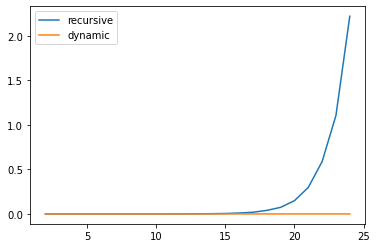

In [114]:
plt.plot(timings['n'], timings['recursive'], label="recursive")
plt.plot(timings['n'], timings['dynamic'], label="dynamic")
plt.legend()
plt.show()